## Clustering and Recommendation Systems

#### Madelin Rioux 300227635 &  Kendyl Snow 300240323

### Introduction

## The Movies Dataset

### Dataset Information

- **Dataset Name:** Full MovieLens Dataset with TMDB Metadata  
- **Author:** Assembled by a Data Science Career Track student at Springboard (Collaborator Rounak Banik) 
- **Purpose:**   
  This dataset was created to perform Exploratory Data Analysis (EDA) on movie data to tell the story of cinema. It also serves to build various types of recommender systems, including content-based and collaborative filtering models.

### Dataset Shape

### `movies_metadata.csv`
- **Rows:** 45,466 movies  
- **Columns:** 24 features  

### `ratings_small.csv`
- **Rows:** 100,004 ratings  
- **Columns:** 4 features  

### Feature List and Descriptions 
#### `movies_metadata.csv`

| Feature Name           | Description                                                               | Type                        |
|------------------------|---------------------------------------------------------------------------|-----------------------------|
| `adult`                | Whether the movie is adult-themed or not                                  | Categorical                 |
| `belongs_to_collection`| Data on collection the movie belongs to (if any)                          | Categorical (JSON/string)   |
| `budget`               | Budget of the movie in USD                                                | Numerical                   |
| `genres`               | List of genres for the movie                                              | Categorical (JSON/string)   |
| `homepage`             | URL of the movie's homepage (if available)                                | Categorical                 |
| `id`                   | TMDB ID of the movie                                                      | Categorical (ID)            |
| `imdb_id`              | IMDB ID of the movie                                                      | Categorical (ID)            |
| `original_language`    | Language in which the movie was originally produced                       | Categorical                 |
| `original_title`       | Original title of the movie                                               | Categorical                 |
| `overview`             | Short summary/description of the movie plot                               | Categorical (Text)          |
| `popularity`           | Popularity score assigned by TMDB                                         | Numerical                   |
| `poster_path`          | URL path to the movie's poster image                                      | Categorical                 |
| `production_companies` | List of companies that produced the movie                                 | Categorical (JSON/string)   |
| `production_countries` | List of countries involved in production                                  | Categorical (JSON/string)   |
| `release_date`         | Official release date                                                     | Categorical (Date)          |
| `revenue`              | Revenue generated by the movie in USD                                     | Numerical                   |
| `runtime`              | Duration of the movie in minutes                                          | Numerical                   |
| `spoken_languages`     | Languages spoken in the movie                                             | Categorical (JSON/string)   |
| `status`               | Release status of the movie (e.g. Released, Post Production)              | Categorical                 |
| `tagline`              | Catchphrase or tagline of the movie                                       | Categorical                 |
| `title`                | Title of the movie                                                        | Categorical                 |
| `video`                | Boolean indicating if it’s a video release                                | Categorical                 |
| `vote_average`         | Average rating score on TMDB                                              | Numerical                   |
| `vote_count`           | Number of user votes received on TMDB                                     | Numerical                   |

#### `ratings_small.csv`

| Feature Name | Description                                  | Type     |
|--------------|----------------------------------------------|----------|
| `userId`     | Unique ID for each user                      | Numerical (int64) |
| `movieId`    | Unique ID for each movie                     | Numerical (int64) |
| `rating`     | Rating given by the user (1.0 to 5.0 scale)  | Numerical (float64) |
| `timestamp`  | Time when the rating was submitted (epoch)   | Numerical (int64) |

### Additional Files

- `keywords.csv`: Plot keywords per movie (as stringified JSON)  
- `credits.csv`: Cast and crew details (stringified JSON)  
- `links.csv`: TMDB and IMDB IDs for movies  
- `links_small.csv`: Smaller subset of links for 9,000 movies  

### Explanation for Choice of Dataset

This dataset provides:

- Movie metadata (budget, revenue, genres, cast, etc.)
- User rating behavior (for recommendation systems)

It is ideal for tasks such as:

- Similarity Measures
- Clustering Algorithims 
- Content based recommendation systems
- Collaborative Filtering Recommendation System

### Importations 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import hamming, cityblock
from difflib import SequenceMatcher
import Levenshtein
import ast
import json


import warnings
warnings.filterwarnings('ignore')

### Reading of the datasets

In [20]:
metadata_df_og = pd.read_csv('datasets/movies_metadata.csv')
ratings_df = pd.read_csv('datasets/ratings_small.csv')

### EDA

**MetaData df**

In [21]:
metadata_df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [22]:
metadata_df_og.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


We will compute all our changes on a copy of the original dataframe

In [54]:
metadata_df = metadata_df_og.copy()

As we can note, Collection, genres, and spoken languages are currently in JSON format. First we will convert them to useful columns
https://www.w3schools.com/python/python_json.asp#:~:text=If%20you%20have%20a%20JSON,will%20be%20a%20Python%20dictionary.

In [55]:
def extract_json(string):
    try:
        json_dict = json.loads(string.replace("'", '"'))
        return json_dict['name']
    except:
        return None


In [56]:
metadata_df['belongs_to_collection_list'] = metadata_df['belongs_to_collection'].apply(extract_json)

https://docs.python.org/3/library/ast.html

In [57]:
def extract_array_json(string):
    try:
        dicts = ast.literal_eval(string)
        return [d['name'] for d in dicts]
    except:
        return []



In [58]:
metadata_df['genres_list'] = metadata_df['genres'].apply(extract_array_json)
metadata_df['spoken_languages_list'] = metadata_df['spoken_languages'].apply(extract_array_json)
metadata_df['production_companies_list'] = metadata_df['production_companies'].apply(extract_array_json)
metadata_df['production_countries_list'] = metadata_df['production_countries'].apply(extract_array_json)

In [59]:
metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,belongs_to_collection_list,genres_list,spoken_languages_list,production_companies_list,production_countries_list
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[English],[Pixar Animation Studios],[United States of America]
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,None,"[Adventure, Fantasy, Family]","[English, Français]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection,"[Romance, Comedy]",[English],"[Warner Bros., Lancaster Gate]",[United States of America]
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,None,"[Comedy, Drama, Romance]",[English],[Twentieth Century Fox Film Corporation],[United States of America]
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection,[Comedy],[English],"[Sandollar Productions, Touchstone Pictures]",[United States of America]


Now we can remove the JSON columns

In [60]:
metadata_df = metadata_df.drop(['belongs_to_collection', 'genres','spoken_languages','production_companies', 'production_countries'], axis=1)

In [61]:
metadata_df.head()

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,tagline,title,video,vote_average,vote_count,belongs_to_collection_list,genres_list,spoken_languages_list,production_companies_list,production_countries_list
0,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[English],[Pixar Animation Studios],[United States of America]
1,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,None,"[Adventure, Fantasy, Family]","[English, Français]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,False,0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection,"[Romance, Comedy]",[English],"[Warner Bros., Lancaster Gate]",[United States of America]
3,False,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,None,"[Comedy, Drama, Romance]",[English],[Twentieth Century Fox Film Corporation],[United States of America]
4,False,0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection,[Comedy],[English],"[Sandollar Productions, Touchstone Pictures]",[United States of America]


In [62]:
metadata_df.isnull().sum()

adult                             0
budget                            0
homepage                      37684
id                                0
imdb_id                          17
original_language                11
original_title                    0
overview                        954
popularity                        5
poster_path                     386
release_date                     87
revenue                           6
runtime                         263
status                           87
tagline                       25054
title                             6
video                             6
vote_average                      6
vote_count                        6
belongs_to_collection_list    42298
genres_list                       0
spoken_languages_list             0
production_companies_list         0
production_countries_list         0
dtype: int64

### Ratings dataset

In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [171]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [172]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### Users dataset

In [177]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [178]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [179]:
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [180]:
is_unique = users_df['User-ID'].is_unique
print(is_unique)

True


In [181]:
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

Oldest person to live was 122, thus every entry greater must be false https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people

In [182]:
(users_df['Age'] >=122).sum()

78

In [183]:
print(f"the # of users older than 122 is {(78/278858) *100}% of the data")

the # of users older than 122 is 0.02797122549828228% of the data


Since we have no way of knowing there actual age, we will replace with 122, (The max acceptable age)

In [184]:
users_df['Age'] = users_df['Age'].clip(upper=122)

In [185]:
users_df['Age'].describe()

count    168096.000000
mean         34.728786
std          14.226883
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         122.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

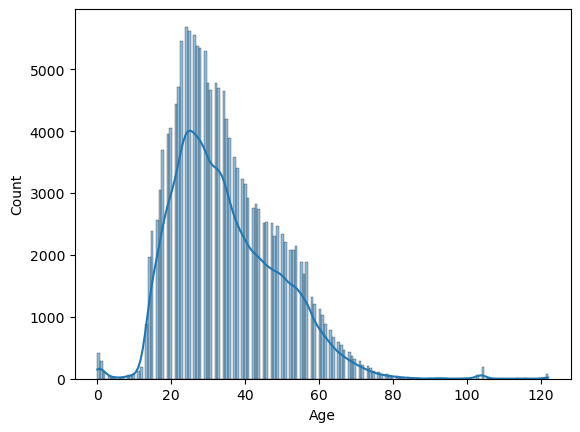

In [186]:
sns.histplot(users_df['Age'], kde=True)

Since it is a skewed distribution we will fill the NA Age values with the median

### DONT KNOW IF THIS IS GOOD TO DO

In [187]:
users_df['Age'] = users_df['Age'].fillna(users_df['Age'].median())

<Axes: xlabel='Age', ylabel='Count'>

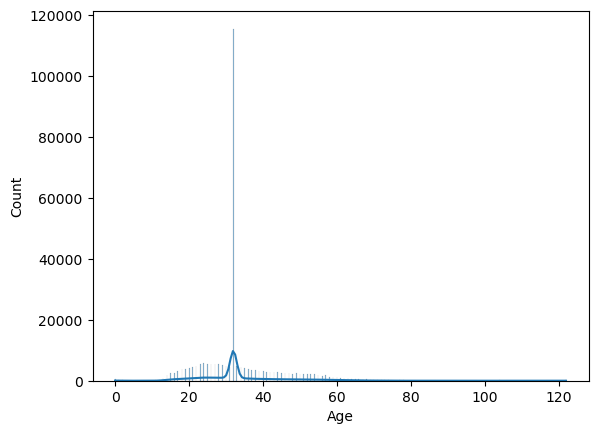

In [188]:
sns.histplot(users_df['Age'], kde=True)

### Study 1

**Similarity functions** https://ashukumar27.medium.com/similarity-functions-in-python-aa6dfe721035

In [196]:
votes = ratings_df.groupby('ISBN').size().reset_index(name='num_votes')

# Merge vote counts into book_df to create book_df_with_votes
book_df_with_votes = book_df.merge(votes, how='left', on='ISBN')
book_df_with_votes['num_votes'] = book_df_with_votes['num_votes'].fillna(0)

In [235]:
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

def euclidean_distance(x, y):
    return np.linalg.norm(np.array(x) - np.array(y))

def euclidean_distance_scalar(x, y):
    return abs(x - y)

def hamming_distance(a, b):
    max_len = max(len(str(a)), len(str(b)))
    a = str(a).ljust(max_len)
    b = str(b).ljust(max_len)
    
    # Convert to list of chars (1D array) to meet scipy's requirement
    return hamming(np.array(list(a)), np.array(list(b)))

def edit_distance(a, b):
    return Levenshtein.distance(a.lower(), b.lower())

def manhattan_distance(x, y):
    return abs(x - y)

In [236]:
# -------- SIMULATION 1: Jaccard Similarity on Book-Author with vote sorting --------
query_author = "J.K. Rowling"
book_df_with_votes['jaccard'] = book_df_with_votes['Book-Author'].apply(lambda x: jaccard_similarity(query_author, x))

print("\n--- Top 10 Books (Author Similarity + Votes) ---")
print(
    book_df_with_votes.sort_values(['jaccard', 'num_votes'], ascending=[False, False])
    .head(10)[['Book-Title', 'Book-Author', 'jaccard', 'num_votes']]
)



--- Top 10 Books (Author Similarity + Votes) ---
                                             Book-Title    Book-Author  \
2143  Harry Potter and the Sorcerer's Stone (Harry P...  J. K. Rowling   
3459   Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling   
5506  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
6330  Harry Potter and the Prisoner of Azkaban (Book 3)  J. K. Rowling   
3839  Harry Potter and the Prisoner of Azkaban (Book 3)  J. K. Rowling   
5431       Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling   
6932       Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling   
5432   Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling   
2809     Harry Potter and the Sorcerer's Stone (Book 1)  J. K. Rowling   
9026     Harry Potter and the Sorcerer's Stone (Book 1)  J. K. Rowling   

      jaccard  num_votes  
2143      1.0      571.0  
3459      1.0      351.0  
5506      1.0      334.0  
6330      1.0      226.0  


In [237]:
# -------- SIMULATION 2: Euclidean Distance on Year with vote sorting --------
query_year = book_df_with_votes[book_df_with_votes['Book-Title'].str.contains("Harry Potter", na=False)]['Year-Of-Publication'].values[0]
book_df_with_votes['euclidean'] = book_df_with_votes['Year-Of-Publication'].apply(lambda x: abs(x - query_year))

print("\n--- Top 10 Books (Year Similarity + Votes) ---")
print(
    book_df_with_votes.sort_values(['euclidean', 'num_votes'], ascending=[True, False])
    .head(10)[['Book-Title', 'Year-Of-Publication', 'euclidean', 'num_votes']]
)


--- Top 10 Books (Year Similarity + Votes) ---
                                             Book-Title  Year-Of-Publication  \
305                                     A Painted House                 2001   
118                                 Angels &amp; Demons                 2001   
231                           Girl with a Pearl Earring                 2001   
1325  Confessions of a Shopaholic (Summer Display Op...                 2001   
833                              Me Talk Pretty One Day                 2001   
1553          A Heartbreaking Work of Staggering Genius                 2001   
712                                          Icy Sparks                 2001   
5065                           Prodigal Summer: A Novel                 2001   
225                   Roses Are Red (Alex Cross Novels)                 2001   
6330  Harry Potter and the Prisoner of Azkaban (Book 3)                 2001   

      euclidean  num_votes  
305           0      647.0  
118          

In [238]:

# -------- SIMULATION 3: Hamming Distance on Publisher with vote sorting --------
query_publisher = "Scholastic Inc."
book_df_with_votes['hamming'] = book_df_with_votes['Publisher'].apply(lambda x: hamming_distance(query_publisher, x))

print("\n--- Top 10 Books (Publisher Similarity + Votes) ---")
print(
    book_df_with_votes.sort_values(['hamming', 'num_votes'], ascending=[True, False])
    .head(10)[['Book-Title', 'Publisher', 'hamming', 'num_votes']]
)



--- Top 10 Books (Publisher Similarity + Votes) ---
                                               Book-Title        Publisher  \
35295               The Lion, the Witch, and the Wardrobe  Scholastic Inc.   
8812                                              The BFG  Scholastic Inc.   
8325                                         School's In!  Scholastic Inc.   
27971                                             Matilda  Scholastic Inc.   
8596                                        Witches , The  Scholastic Inc.   
8079    The Yellow House Mystery (The Boxcar Children,...  Scholastic Inc.   
34050                                 Pippi Longstockings  Scholastic Inc.   
133881  The Haunted Cabin Mystery #20 (The Boxcar Chil...  Scholastic Inc.   
98890                                           Wish List  Scholastic Inc.   
106720                                  Mary, Bloody Mary  Scholastic Inc.   

        hamming  num_votes  
35295       0.0       24.0  
8812        0.0       23.0  
8

In [239]:
print("\n--- SIMULATION 4: Edit Distance on Book-Title ---")
query_title_edit = "Twilight"
book_df_with_votes['edit'] = book_df_with_votes['Book-Title'].apply(lambda x: edit_distance(query_title_edit, x))

print(
    book_df_with_votes.sort_values(['edit', 'num_votes'], ascending=[True, False])
    .head(10)[['Book-Title', 'Publisher', 'edit', 'num_votes']]
)


--- SIMULATION 4: Edit Distance on Book-Title ---
        Book-Title                 Publisher  edit  num_votes
40297     TWILIGHT                    Pocket     0        8.0
19812     Twilight              Summit Books     0        5.0
80613     Twilight  Bethany House Publishers     0        4.0
46380     TWILIGHT                    Pocket     0        3.0
4384        Flight                    Pocket     3       33.0
37917    Rainlight               Picador USA     3       10.0
85933       Flight      Simon &amp; Schuster     3        9.0
59971  At Twilight                Silhouette     3        6.0
57149      Delight                    Pocket     3        3.0
87784     Daylight          Ballantine Books     3        3.0


In [240]:
# 5. Show users with similar age to someone aged 25 (Manhattan Distance)
query_age = 25
users = users_df.copy()
users['manhattan'] = users['Age'].apply(lambda x: manhattan_distance(query_age, x))
print("\nTop 10 users with similar age to 25:")
print(users.sort_values('manhattan').head(10)[['User-ID', 'Age', 'manhattan']])


Top 10 users with similar age to 25:
        User-ID   Age  manhattan
29490     29491  25.0        0.0
118019   118020  25.0        0.0
252903   252904  25.0        0.0
252900   252901  25.0        0.0
190541   190542  25.0        0.0
91234     91235  25.0        0.0
252870   252871  25.0        0.0
75772     75773  25.0        0.0
252929   252930  25.0        0.0
23036     23037  25.0        0.0


### Study 2

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Attribute Combination 1: Year-Of-Publication vs num_votes
combo1 = book_df_with_votes[['Year-Of-Publication', 'num_votes']].copy()
combo1 = combo1.dropna()
combo1 = StandardScaler().fit_transform(combo1)

# Attribute Combination 2: Age vs num_votes (merge book_df with users_df on ISBN)
combo2_df = ratings_df.merge(users_df, on='User-ID').merge(book_df_with_votes, on='ISBN')
combo2 = combo2_df[['Age', 'num_votes']].dropna()
combo2 = StandardScaler().fit_transform(combo2)

# -------------------- KMEANS CLUSTERING --------------------

for i, data in enumerate([combo1, combo2], start=1):
    for k in [3, 5]:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        plt.figure(figsize=(6, 5))
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=20)
        plt.title(f"KMeans (k={k}) on Combo {i}")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

# -------------------- DBSCAN CLUSTERING --------------------

for i, data in enumerate([combo1, combo2], start=1):
    for eps in [0.5, 0.7]:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels = dbscan.fit_predict(data)
        plt.figure(figsize=(6, 5))
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='plasma', s=20)
        plt.title(f"DBSCAN (eps={eps}, min_samples=5) on Combo {i}")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

AttributeError: 'NoneType' object has no attribute 'split'